In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [41]:
df = pd.read_csv("India_data.csv")

df.drop("Unnamed: 0", axis=1, inplace=True)
df["date"]=pd.to_datetime(df["date"])


In [4]:
df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [42]:
df['date'].min(), df['date'].max()

(Timestamp('2020-03-20 00:00:00'), Timestamp('2021-04-08 00:00:00'))

In [44]:
df = df.sort_values('date')
df.isnull().sum()

7_day_lagged_retail_and_recreation_percent_change_from_baseline    0
7_day_lagged_grocery_and_pharmacy_percent_change_from_baseline     0
7_day_lagged_parks_percent_change_from_baseline                    0
7_day_lagged_transit_stations_percent_change_from_baseline         0
7_day_lagged_workplaces_percent_change_from_baseline               0
7_day_lagged_residential_percent_change_from_baseline              0
new_cases_smoothed                                                 0
new_deaths_smoothed                                                0
new_tests_smoothed                                                 0
positive_rate                                                      0
tests_per_case                                                     0
date                                                               0
dtype: int64

In [45]:
df

,7_day_lagged_retail_and_recreation_percent_change_from_baseline,7_day_lagged_grocery_and_pharmacy_percent_change_from_baseline,7_day_lagged_parks_percent_change_from_baseline,7_day_lagged_transit_stations_percent_change_from_baseline,7_day_lagged_workplaces_percent_change_from_baseline,7_day_lagged_residential_percent_change_from_baseline,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,positive_rate,tests_per_case,date
0,-9.666667,0.000000,-3.500000,-7.000000,-4.000000,3.000000,23.143,0.429,1125.0,0.021,48.6,2020-03-20
1,-11.500000,0.000000,-4.666667,-9.000000,-5.833333,3.666667,32.571,0.286,1125.0,0.029,34.5,2020-03-21
2,-13.333333,0.666667,-5.833333,-10.666667,-7.333333,4.166667,40.429,0.714,1121.0,0.036,27.7,2020-03-22
3,-17.166667,0.166667,-8.666667,-13.666667,-10.666667,5.000000,54.286,1.143,1462.0,0.037,26.9,2020-03-23
4,-28.833333,-12.833333,-18.166667,-24.333333,-18.166667,8.000000,56.286,1.000,1295.0,0.043,23.0,2020-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...
380,-27.166667,12.166667,-15.500000,-13.833333,-25.500000,12.000000,78489.000,465.429,1025009.0,0.077,13.1,2021-04-04
381,-26.166667,14.000000,-15.166667,-13.166667,-25.500000,11.833333,84313.429,490.429,1022214.0,0.082,12.1,2021-04-05
382,-24.000000,18.500000,-13.666667,-8.833333,-16.833333,9.666667,93207.143,529.857,1083035.0,0.086,11.6,2021-04-06
383,-23.333333,20.166667,-13.000000,-8.333333,-15.833333,9.666667,100987.000,562.143,1109523.0,0.091,11.0,2021-04-07


In [46]:
df

,7_day_lagged_retail_and_recreation_percent_change_from_baseline,7_day_lagged_grocery_and_pharmacy_percent_change_from_baseline,7_day_lagged_parks_percent_change_from_baseline,7_day_lagged_transit_stations_percent_change_from_baseline,7_day_lagged_workplaces_percent_change_from_baseline,7_day_lagged_residential_percent_change_from_baseline,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,positive_rate,tests_per_case,date
0,-9.666667,0.000000,-3.500000,-7.000000,-4.000000,3.000000,23.143,0.429,1125.0,0.021,48.6,2020-03-20
1,-11.500000,0.000000,-4.666667,-9.000000,-5.833333,3.666667,32.571,0.286,1125.0,0.029,34.5,2020-03-21
2,-13.333333,0.666667,-5.833333,-10.666667,-7.333333,4.166667,40.429,0.714,1121.0,0.036,27.7,2020-03-22
3,-17.166667,0.166667,-8.666667,-13.666667,-10.666667,5.000000,54.286,1.143,1462.0,0.037,26.9,2020-03-23
4,-28.833333,-12.833333,-18.166667,-24.333333,-18.166667,8.000000,56.286,1.000,1295.0,0.043,23.0,2020-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...
380,-27.166667,12.166667,-15.500000,-13.833333,-25.500000,12.000000,78489.000,465.429,1025009.0,0.077,13.1,2021-04-04
381,-26.166667,14.000000,-15.166667,-13.166667,-25.500000,11.833333,84313.429,490.429,1022214.0,0.082,12.1,2021-04-05
382,-24.000000,18.500000,-13.666667,-8.833333,-16.833333,9.666667,93207.143,529.857,1083035.0,0.086,11.6,2021-04-06
383,-23.333333,20.166667,-13.000000,-8.333333,-15.833333,9.666667,100987.000,562.143,1109523.0,0.091,11.0,2021-04-07


In [48]:
df = df.set_index('date')
df.index

DatetimeIndex(['2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29',
               ...
               '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02',
               '2021-04-03', '2021-04-04', '2021-04-05', '2021-04-06',
               '2021-04-07', '2021-04-08'],
              dtype='datetime64[ns]', name='date', length=385, freq=None)

In [49]:
df.columns

Index(['7_day_lagged_retail_and_recreation_percent_change_from_baseline',
       '7_day_lagged_grocery_and_pharmacy_percent_change_from_baseline',
       '7_day_lagged_parks_percent_change_from_baseline',
       '7_day_lagged_transit_stations_percent_change_from_baseline',
       '7_day_lagged_workplaces_percent_change_from_baseline',
       '7_day_lagged_residential_percent_change_from_baseline',
       'new_cases_smoothed', 'new_deaths_smoothed', 'new_tests_smoothed',
       'positive_rate', 'tests_per_case'],
      dtype='object')

In [58]:
y = df[['7_day_lagged_retail_and_recreation_percent_change_from_baseline',
       '7_day_lagged_grocery_and_pharmacy_percent_change_from_baseline',
       '7_day_lagged_parks_percent_change_from_baseline',
       '7_day_lagged_transit_stations_percent_change_from_baseline',
       '7_day_lagged_workplaces_percent_change_from_baseline',
       '7_day_lagged_residential_percent_change_from_baseline',
       'new_cases_smoothed', 'new_deaths_smoothed', 'new_tests_smoothed',
       'positive_rate', 'tests_per_case']].resample('MS').mean()

In [68]:
y = df["new_cases_smoothed"]

In [55]:
df.columns

Index(['7_day_lagged_retail_and_recreation_percent_change_from_baseline',
       '7_day_lagged_grocery_and_pharmacy_percent_change_from_baseline',
       '7_day_lagged_parks_percent_change_from_baseline',
       '7_day_lagged_transit_stations_percent_change_from_baseline',
       '7_day_lagged_workplaces_percent_change_from_baseline',
       '7_day_lagged_residential_percent_change_from_baseline',
       'new_cases_smoothed', 'new_deaths_smoothed', 'new_tests_smoothed',
       'positive_rate', 'tests_per_case'],
      dtype='object')

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# df_no_date_no_place = df.drop(["date"], axis=1)
df[df.columns] = scaler.fit_transform(df[df.columns])
df

,7_day_lagged_retail_and_recreation_percent_change_from_baseline,7_day_lagged_grocery_and_pharmacy_percent_change_from_baseline,7_day_lagged_parks_percent_change_from_baseline,7_day_lagged_transit_stations_percent_change_from_baseline,7_day_lagged_workplaces_percent_change_from_baseline,7_day_lagged_residential_percent_change_from_baseline,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,positive_rate,tests_per_case
date,,,,,,,,,,,
2020-03-20,1.000000,0.738964,1.000000,0.961353,1.000000,0.000000,0.000000,0.000122,0.000003,0.045045,0.752768
2020-03-21,0.975983,0.738964,0.980663,0.932367,0.970976,0.024845,0.000087,0.000000,0.000003,0.117117,0.492620
2020-03-22,0.951965,0.746641,0.961326,0.908213,0.947230,0.043478,0.000160,0.000367,0.000000,0.180180,0.367159
2020-03-23,0.901747,0.740883,0.914365,0.864734,0.894459,0.074534,0.000288,0.000734,0.000285,0.189189,0.352399
2020-03-24,0.748908,0.591171,0.756906,0.710145,0.775726,0.186335,0.000306,0.000611,0.000146,0.243243,0.280443
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-04,0.770742,0.879079,0.801105,0.862319,0.659631,0.335404,0.725337,0.398336,0.856200,0.549550,0.097786
2021-04-05,0.783843,0.900192,0.806630,0.871981,0.659631,0.329193,0.779178,0.419746,0.853863,0.594595,0.079336
2021-04-06,0.812227,0.952015,0.831492,0.934783,0.796834,0.248447,0.861392,0.453511,0.904723,0.630631,0.070111


In [69]:
y.shape

(385,)

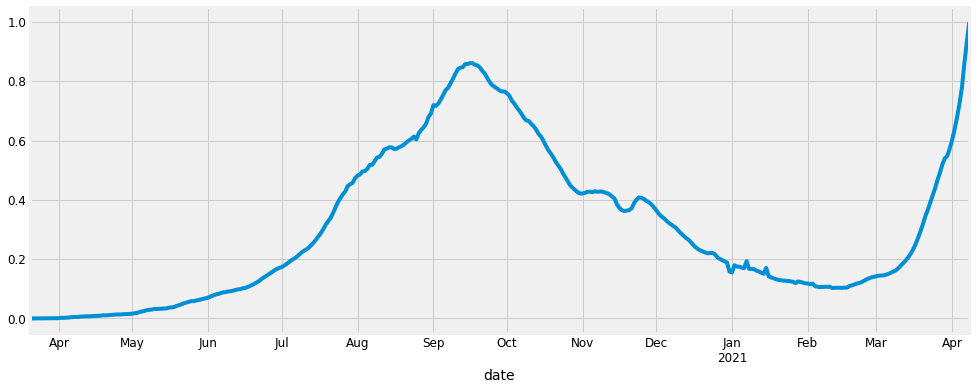

In [70]:
y.plot(figsize=(15, 6))
plt.show()

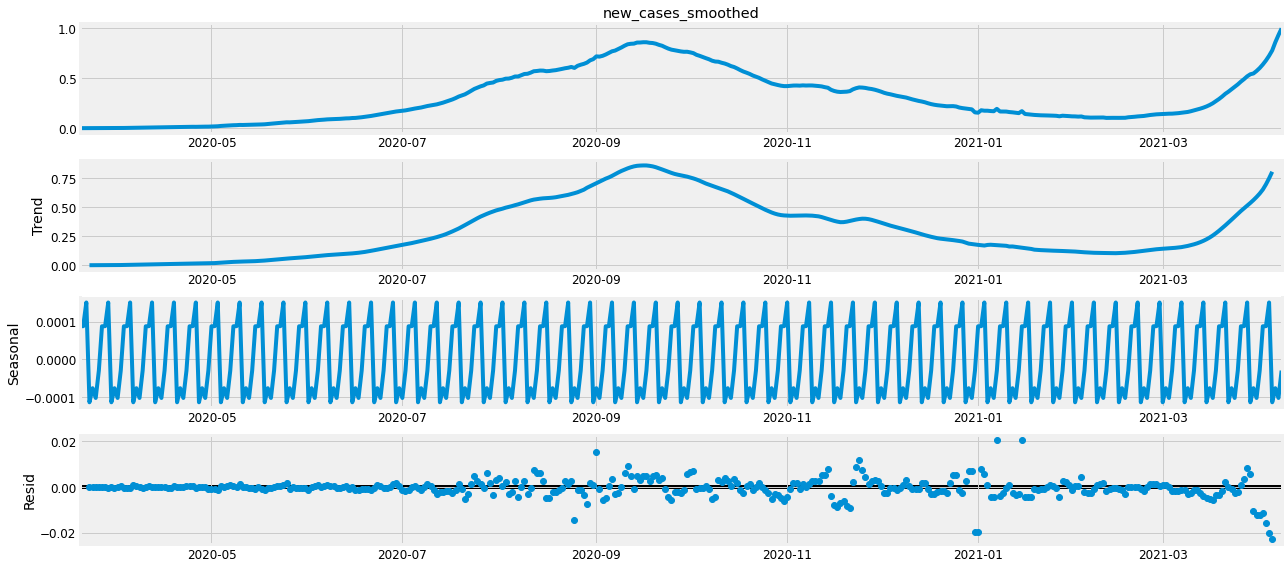

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [72]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [101]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:'2021-02-28'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False, freq=10)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [102]:
mod = sm.tsa.statespace.SARIMAX(y[:'2021-02-28'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/home/think__tech/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/think__tech/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8925      0.044     20.420      0.000       0.807       0.978
ma.L1         -1.7180      0.199     -8.647      0.000      -2.107      -1.329
ar.S.L12      -0.4870      0.028    -17.335      0.000      -0.542      -0.432
sigma2      1.785e-05   3.88e-06      4.606      0.000    1.03e-05    2.55e-05


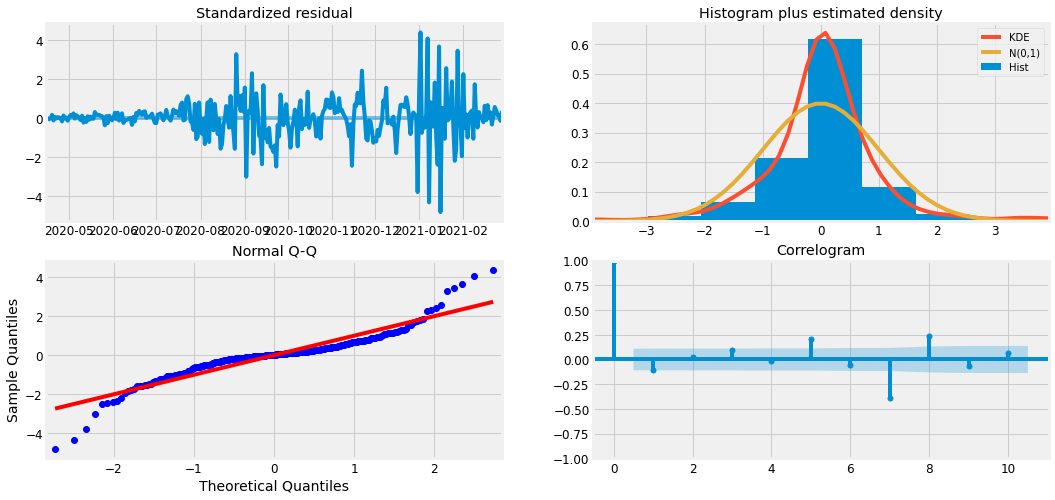

In [103]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

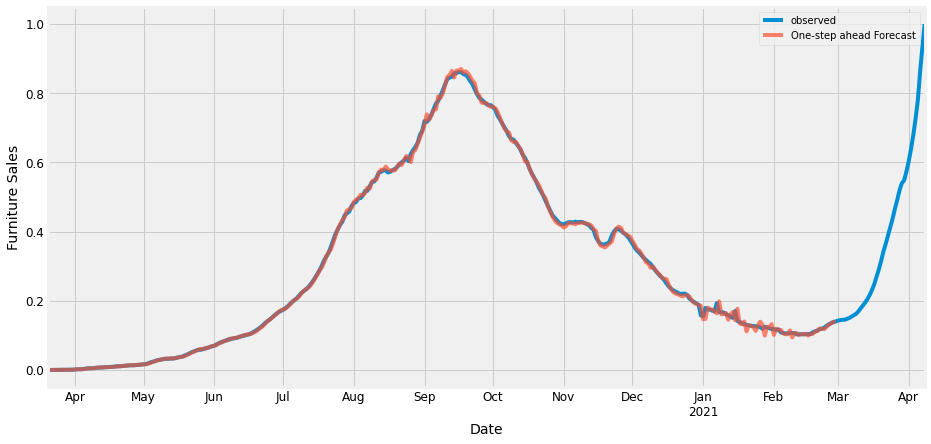

In [104]:
pred = results.get_prediction(start=pd.to_datetime('2020-03-20'))
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [105]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-03-20':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


In [106]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.01


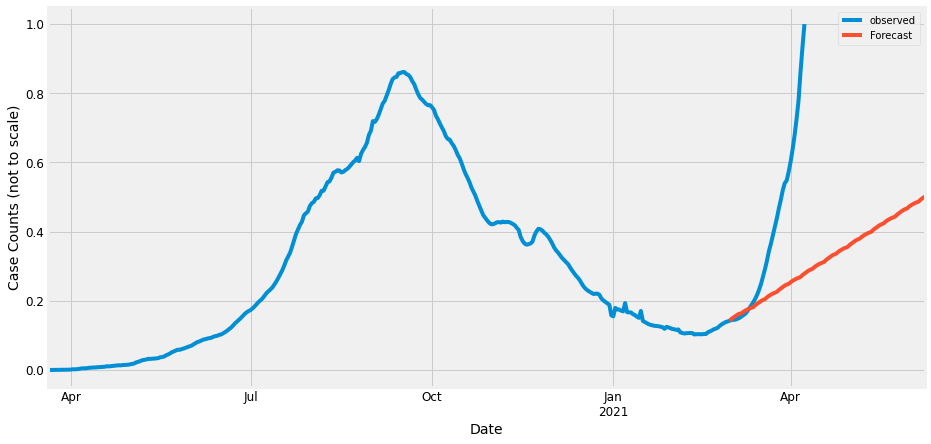

In [107]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Case Counts (not to scale)')
plt.legend()
plt.savefig("CasesPred.png")
# plt.show()
